# Исследование надежности заемщиков.



Запрос на исследования от кредитного отдела банка. 

Необходимо выявить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

На основании диапазонов, указанных ниже, создайте столбец total_income_category с категориями:
<br>0–30000 — 'E';
<br>30001–50000 — 'D';
<br>50001–200000 — 'C';
<br>200001–1000000 — 'B';
<br>1000001 и выше — 'A'.


Результаты исследования будут учтены при построении модели кредитного скоринга.

## Обзор данных

Описание данных:<br>
children — количество детей в семье<br>
days_employed — общий трудовой стаж в днях<br>
dob_years — возраст клиента в годах<br>
education — уровень образования клиента<br>
education_id — идентификатор уровня образования<br>
family_status — семейное положение<br>
family_status_id — идентификатор семейного положения<br>
gender — пол клиента<br>
income_type — тип занятости<br>
debt — имел ли задолженность по возврату кредитов<br>
total_income — ежемесячный доход<br>
purpose — цель получения кредита

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')

display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
df.duplicated().sum()

54

In [4]:
df = df.drop_duplicates().reset_index(drop = True)
df.duplicated().sum()

0

In [5]:
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21435,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21441,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21443,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21448,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [6]:
f"{df['days_employed'].isna().sum()/len(df):.2%} пропусков в столбце total_income"

'9.87% пропусков в столбце total_income'

In [7]:
display( df[ (df['days_employed'].isna()) & (df['total_income']>0) ]) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [8]:
df[df['days_employed'].isna()]['total_income'].sum()

0.0

Данные показывают, что люди с отсутсвием трудоустройства так же и не имеют дохода. 

Посмотрим, есть ли группировка по пропущенным значениям. Возможно, пропущены значения только в определенных категориях.

In [9]:
for x in ['income_type','family_status','purpose']:
    display(df[df['days_employed'].isna()][x].unique())

array(['пенсионер', 'госслужащий', 'компаньон', 'сотрудник',
       'предприниматель'], dtype=object)

array(['гражданский брак', 'женат / замужем', 'Не женат / не замужем',
       'вдовец / вдова', 'в разводе'], dtype=object)

array(['сыграть свадьбу', 'образование',
       'строительство жилой недвижимости',
       'сделка с подержанным автомобилем',
       'операции с коммерческой недвижимостью', 'покупка жилья для семьи',
       'жилье', 'операции с жильем', 'на проведение свадьбы',
       'покупка жилой недвижимости', 'профильное образование',
       'высшее образование', 'автомобиль', 'свадьба',
       'строительство недвижимости', 'свой автомобиль',
       'на покупку подержанного автомобиля',
       'строительство собственной недвижимости', 'покупка своего жилья',
       'заняться высшим образованием', 'недвижимость',
       'операции со своей недвижимостью', 'покупка жилья для сдачи',
       'сделка с автомобилем', 'приобретение автомобиля',
       'получение высшего образования', 'дополнительное образование',
       'на покупку автомобиля', 'покупка недвижимости', 'автомобили',
       'покупка коммерческой недвижимости', 'покупка жилья',
       'получение образования', 'операции с недвижимостью',
  

In [10]:
df['debt'].sum()/len(df['debt'])*100

8.108611615667645

In [11]:
df[df['days_employed'].isna()]['debt'].sum()/df['days_employed'].isna().sum()*100

8.018867924528301

In [12]:
import matplotlib.pyplot as plt

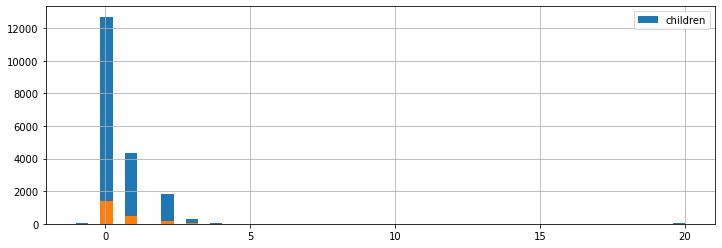

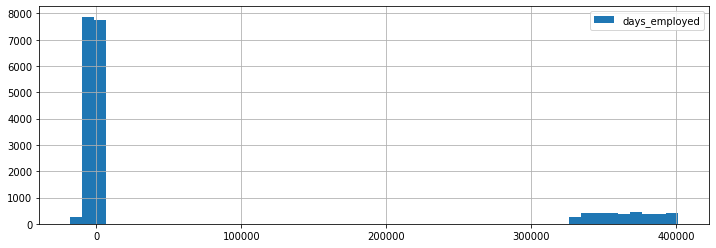

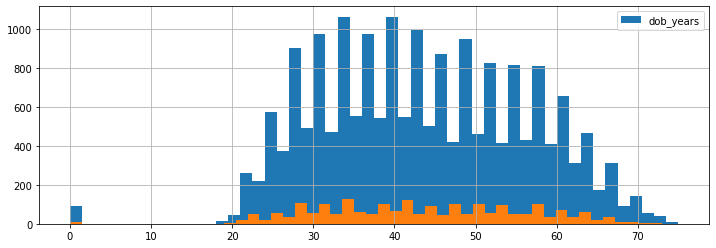

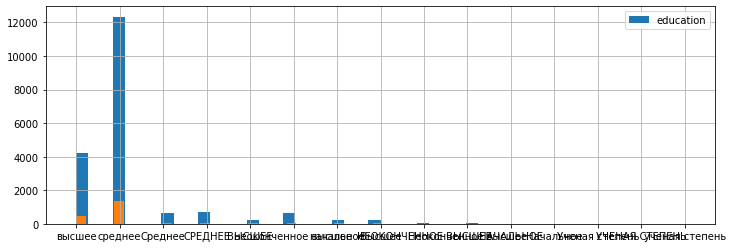

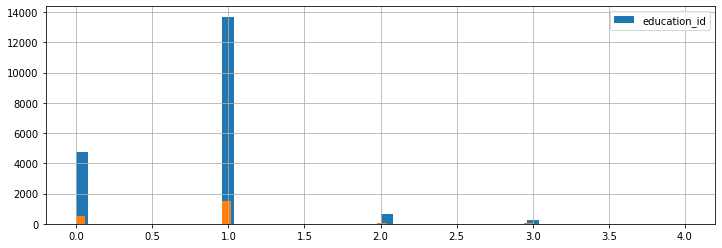

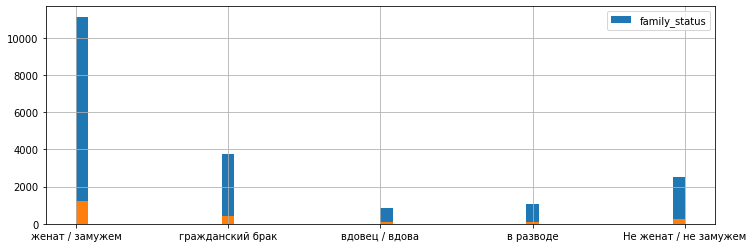

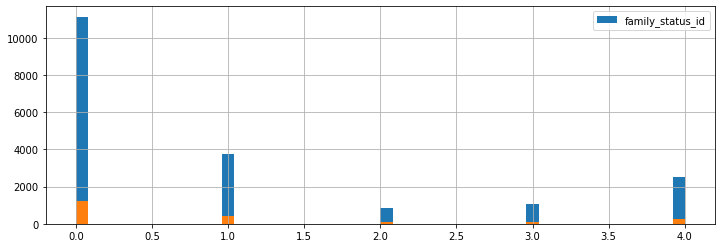

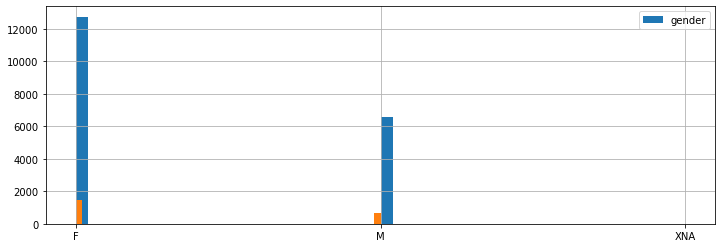

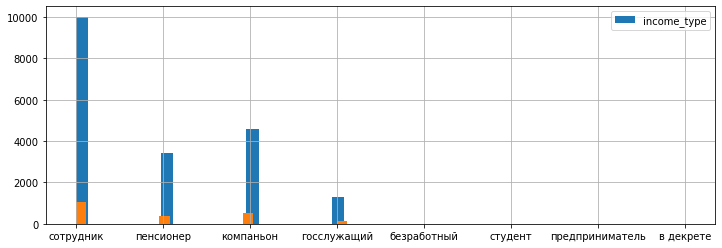

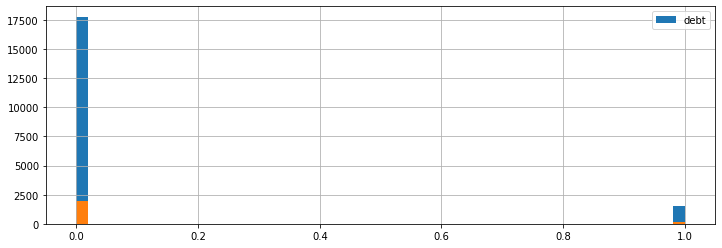

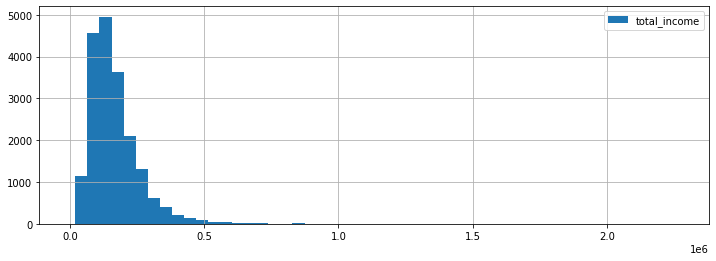

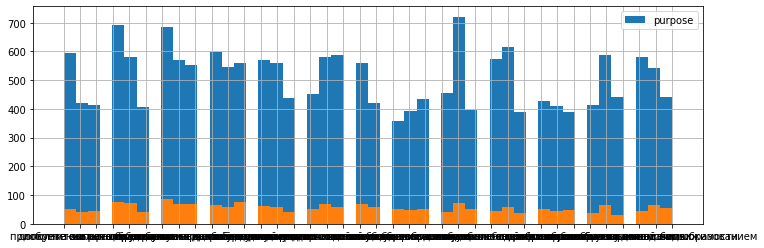

In [13]:
for x in df.columns:
    df[df['days_employed'].notna()][x].hist(legend = True, figsize = (12,4), bins = 50) 
    df[df['days_employed'].isna()][x].hist(bins = 50)
    plt.show()

Данные по дням работы и доходу либо есть, либо одновременно отсутвтуют в обоих столбцах. <br> При этом тип дохода у всех разный, семейный статус или цель кредита у всех разные. Получается, что данные просто пропущены у 2174 строк, что является чуть более 10% всего дата сета.
Однако стоит отметить удивительную однородность данных.

**Поскольку это учебный проект, эти данные мы не выкидываем, а учимся заполнять.**

### Шаг Заполнение пропусков

In [14]:
#сравним как отличаются средние и медианные значения
print('среднее количество дней найма', df['days_employed'].mean())
print('медианное количество дней найма', df['days_employed'].median())
print('')
print('среднее количество дохода', df['total_income'].mean())
print('медианное количество дохода', df['total_income'].median())

среднее количество дней найма 63046.49766147338
медианное количество дней найма -1203.369528770489

среднее количество дохода 167422.30220817294
медианное количество дохода 145017.93753253992


In [15]:
df['income_type'].value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

Мелкие выборки по 4 оставшимся категориям являются крайне не информативными.

In [16]:
df = df.query('income_type != "безработный" & income_type != "предприниматель" & income_type != "студент" & income_type != "в декрете" ')

In [17]:
display(round(df[df['days_employed'].isna()]['income_type'].value_counts()/df['income_type'].value_counts()*100,2))

сотрудник       9.71
компаньон       9.90
пенсионер      10.27
госслужащий     9.95
Name: income_type, dtype: float64

Порядка 50% заемщиков - сотрудники, а еще 50% - пенсионеры, компаньоны, госслужащие. 

<br/>Причины пропущенных данных могут быть разными, но судя по ровности пропусков - это не системная ошибка по категориям. Возможно, это какие-то сбои в программе работы с клиентами или невнимательность сотрудников в отдельных случаях.
<br/>Ну что же, по всей видимости, поскольку пропущенные данные очень ровно пропущены по всем категориям, логичным кажется заменить эти пропуски в строке 'total_income' на медианные значение по столбцу.


In [18]:
median_total_income = df.groupby(by = 'income_type').median()
display(median_total_income)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
income_type,,,,,,,
госслужащий,0,-2689.368353,40,1,0,0,150447.935283
компаньон,0,-1547.382223,39,1,0,0,172357.950966
пенсионер,0,365213.306266,60,1,0,0,118514.486412
сотрудник,0,-1574.202821,39,1,0,0,142594.396847


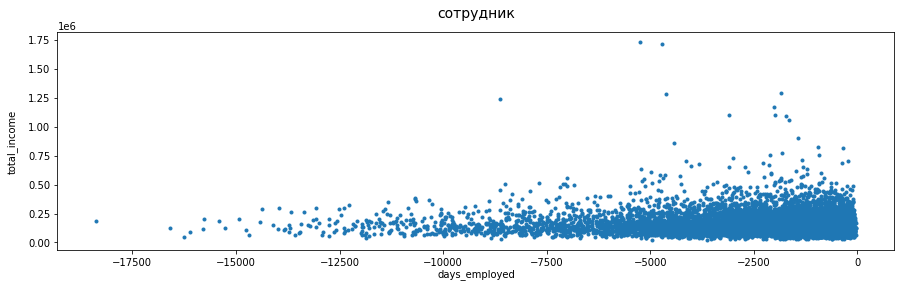

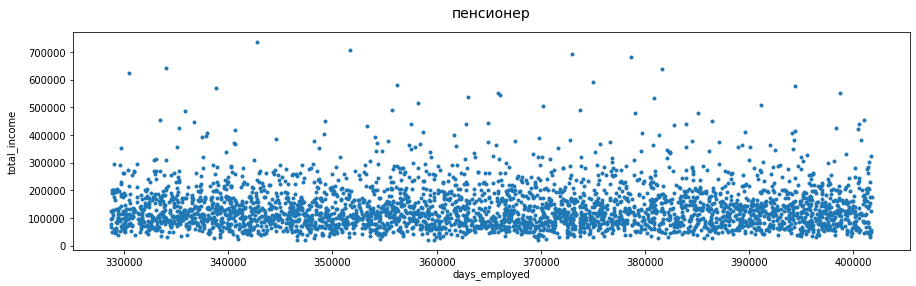

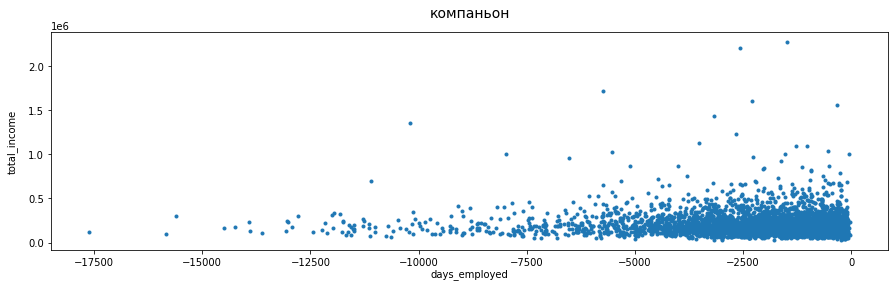

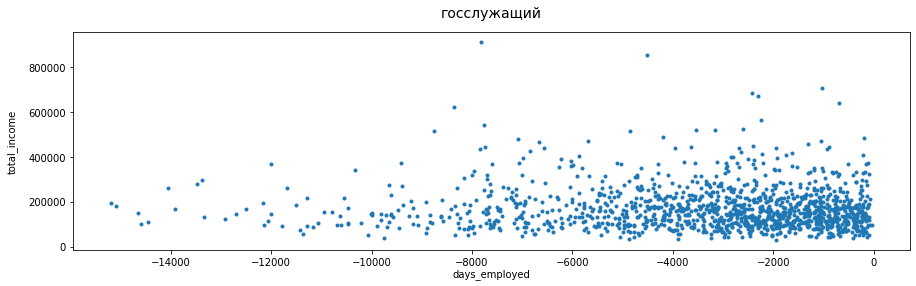

In [19]:
for type in df.income_type.unique():
    plt.figure(figsize=(15,4))
    plt.xlabel("days_employed", fontsize=10, labelpad=1)
    plt.ylabel("total_income", fontsize=10, labelpad=10)
    plt.title(type, fontsize=14, pad=15)
    plt.scatter(df.query('income_type == @type')['days_employed'], df.query('income_type == @type')['total_income'], marker = '.')
    plt.show()

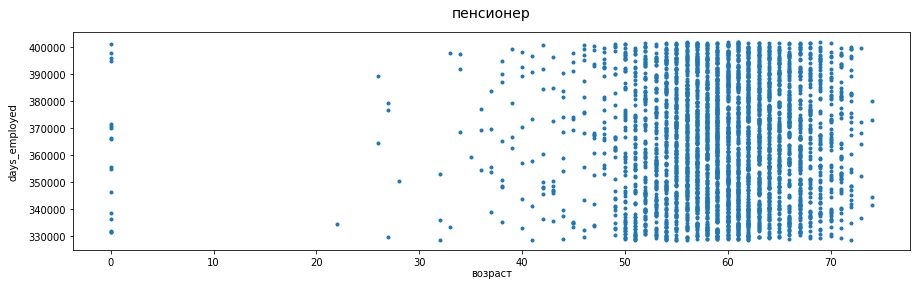

In [20]:
plt.figure(figsize=(15,4))
plt.xlabel("возраст", fontsize=10, labelpad=1)
plt.ylabel("days_employed", fontsize=10, labelpad=10)
plt.title('пенсионер', fontsize=14, pad=15)
plt.scatter(df.query('income_type == "пенсионер"')['dob_years'], df.query('income_type == "пенсионер"')['days_employed'], marker = '.')
plt.show()

У всех, кто формально "работает" - значение в колонке "days_employed" отрицательное. А вот у пенсионеров это значение положительное. 
    <br/> Заполним пропуски в total_income медианными значениямит по категории дохода

In [21]:
for type in median_total_income.index:
    df.loc[df['income_type'] == type, 'total_income'] = df.loc[df['income_type'] == type, 'total_income'].fillna(value = median_total_income.loc[type, 'total_income'])


In [24]:
for type in median_total_income.index:
    df.loc[df['income_type'] == type, 'days_employed'] = df.loc[df['income_type'] == type, 'days_employed'].fillna(value = median_total_income.loc[type, 'days_employed'])


In [25]:
df.info() #проверяем, что всё заполнилось

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21465 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21465 non-null  int64  
 1   days_employed     21465 non-null  float64
 2   dob_years         21465 non-null  int64  
 3   education         21465 non-null  object 
 4   education_id      21465 non-null  int64  
 5   family_status     21465 non-null  object 
 6   family_status_id  21465 non-null  int64  
 7   gender            21465 non-null  object 
 8   income_type       21465 non-null  object 
 9   debt              21465 non-null  int64  
 10  total_income      21465 non-null  float64
 11  purpose           21465 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


### Проверка данных на аномалии и исправления.

In [28]:
display(df.groupby(by = 'income_type').median())

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
income_type,,,,,,,
госслужащий,0,-2689.368353,40,1,0,0,150447.935283
компаньон,0,-1547.382223,39,1,0,0,172357.950966
пенсионер,0,365213.306266,60,1,0,0,118514.486412
сотрудник,0,-1574.202821,39,1,0,0,142594.396847


Вернувшись к задече, поставленной нам из банка:
    
    "влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок" 
    
получаем, что нам не важны (а если быть честным - совсем не важны) значения в столбце 'days_employed'
    <br/>
    <br/> Тем не менее, кажется, что отрицательные значения в днях реалистичны, потому их необходимо перевести в положительные.
    <br/> Текущие положительные значения находятся в районе 365 тысяч дней или 1000 лет. Мне видится, что у пенсионера стаж не может быть ни 1000, ни даже 100 лет. Но и 10 лет для пенсионера кажется маловатым. Так же выбивается что безработные обладают таким же стажем. Возможно, из этих значений нужно вычесть какую-то константу, которая приведёт значения к нормальному исходу.
    <br/>
    <br/>Что будет, если сравнить выборки людей от 40 до 60 лет - работающих и пенсионеров?

In [29]:
#средний стаж работников от 40 до 60 лет
avr_workers_days_employed = df[(df['dob_years'] >= 40) & 
                               (df['dob_years'] <= 60) & 
                               (df['income_type'] == 'сотрудник')]['days_employed'].mean()
avr_workers_days_employed*(-1)

2769.63967769936

In [30]:
#средний стаж пенсионеров от 40 до 60 лет
avr_retiree_days_employed =  df[(df['dob_years'] >= 40) & 
                               (df['dob_years'] <= 60) & 
                               (df['income_type'] == 'пенсионер')]['days_employed'].mean()
avr_retiree_days_employed

364773.75006148947

In [31]:
#посмотрим переводной коэфициент

retiree_to_workers_coeff = avr_retiree_days_employed / avr_workers_days_employed*(-1)
retiree_to_workers_coeff

131.70440653294435

In [32]:
#проверим, что будет, если применить такой коэффициент к стажу пенсионеров и безработных

retiree_list = pd.DataFrame( data = df[df['days_employed'] > 0])
#retiree_list['days_employed'] = retiree_list['days_employed'].astype('int')


retiree_list['days_employed'] = retiree_list['days_employed'] / retiree_to_workers_coeff

display(retiree_list)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,2583.558751,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,2772.977123,65,среднее,1,гражданский брак,1,M,пенсионер,0,118514.486412,сыграть свадьбу
18,0,3039.238758,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,2570.543855,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,2760.336567,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
...,...,...,...,...,...,...,...,...,...,...,...,...
21451,0,2573.223443,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21454,0,2934.584531,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21455,0,2749.802103,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21464,0,2839.659816,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем


In [33]:
#сравним средний стаж работников и других
print(df[df['income_type'] == 'сотрудник']['days_employed'].mean())
print(retiree_list[retiree_list['income_type'] != 'сотрудник']['days_employed'].mean())

-2253.4469017287774
2771.5476314055068


    Получили что-то похожее на правду. Если посчитать на калькуляторе средние значения стажа для работников в годах, то получается 7 лет. Если среднее значение стажа пенсионеров разделить на 7 - получается около 52 тысяч. Еще одна из теорий - возможно для неработающих по какой-то причине стаж записан в неделях и умножен на тысячу. 
    У меня нет этому объяснения.

посмотрим уникальные значения столбцов, чтобы "увидеть аномалии"

In [39]:
for name in df.columns:
    print(df[name].unique(), '   ', name)

[ 1  0  3  2 -1  4 20  5]     children
[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]     days_employed
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]     dob_years
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']     education
[0 1 2 3 4]     education_id
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']     family_status
[0 1 2 3 4]     family_status_id
['F' 'M' 'XNA']     gender
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий']     income_type
[0 1]     debt
[253875.6394526  112080.01410244 145885.95229686 ...  89672.56115303
 244093.05050043  82047.41889948]     total_income
['покупка жилья' 'приоб


Количество детей - есть явная ошибка "-1". И возможна неявная - 20 детей. Нужно проверить эти строчки.
<br/>
<br/>
    Возраст заёмщиков начинается с нуля лет. Это явная ошибка. Данные не критичные, можно заменить на средний возраст по столбцу.
<br/>
<br/> 
    В графе 'образование' много повторов, но удалять мы их будем позже. Сейчас мы видим, что есть 5 типов образования и 5 индексов. Тут всё корректно. 
<br/>
<br/> 
    С семейным статусом всё корректно. Нет повторов. Пять видов статусов и пять индикаторов статусов.
<br/>
<br/>
    Обнаружился уникальный гендер XNA, хотя индексов для гендера всего два. Очевидно, это ошибка. Поскольку мы будем оценивать количество детей и семейное положение, то можно это значение заменить на любое по вкусу.
<br/>
<br/>
    Значения в графе "цель кредита" не блещут структурированностью, но явных ошибок не содержат.
<br/>
<br/> ИТОГО:<br/> 1) Разобраться с количеством детей. <br/>2) Разобраться с возрастом <br/>3) Разобраться с уникальным гендером.
    
    


In [40]:
#проверим сколько строк содержат "-1" и "20" детей.

df['children'].value_counts()


 0     14103
 1      4808
 2      2051
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [41]:
#проверим сколько людей в ноль лет взяли кредит.

loaner_by_age = df.groupby(by = 'dob_years')['purpose'].count()

loaner_by_age.head(5)


dob_years
0     101
19     14
20     51
21    111
22    182
Name: purpose, dtype: int64

In [42]:
#проверим, сколько людей имеют уникальный генедр

df['gender'].value_counts()


F      14186
M       7278
XNA        1
Name: gender, dtype: int64


ИТОГО: 76 людей с 20 детьми (явная ошибка), 47 людей с минус одним ребенком (явная ошибка).
<br/>
<br/>1) Поскольку у нас 21525 измерений, а строк с ошибками 76+47 = 123, то это составляет 0.5%. Уверен, что "гадать" на данных с ошибкой в критической информации явно не стоит, а уж тем более там, где это составляет такой низкий процент от выборки.
<br/>
<br/>2) Люди без возраста будут превращены в людей со средним возрастом по столбцу
<br/>
<br/>3) Уникальный гендер в единственном экземпляре, будет заменен на 'F', поскольку значений в этом подтипе в два раза больше, а значит влияние будет минимальным.
<br/>
<br/> Так же необходимо отрицательный стаж умножить на '-1'.
<br/>
<br/> Поехали!


In [46]:
# 1) Удаляем строки с некорректным количеством детей и сбрасываем индексы
df = df.loc[df['children'] != -1]
df = df.loc[df['children'] != 20].reset_index(drop=True)
df['children'].value_counts()



0    14103
1     4808
2     2051
3      330
4       41
5        9
Name: children, dtype: int64

In [47]:
# 2) первращаем возраст "ноль" в средний по столбцу
median_age = df['dob_years'].median()

df.loc[df['dob_years'] == 0, 'dob_years'] = median_age
df.groupby(by = 'dob_years')['dob_years'].count()[40:45] 
#наши 101 человек с возрастом ноль превратились в +95 человек с возрастом 42 
#похоже у кого-то из них было -1 или 20 детей


dob_years
40.0    601
41.0    602
42.0    691
43.0    509
44.0    541
45.0    493
Name: dob_years, dtype: int64

In [48]:
# 3) первращаем гендер "XNA" в 'F'

df.loc[df['gender'] == 'XNA','gender'] = 'F'
df['gender'].value_counts()


F    14105
M     7237
Name: gender, dtype: int64

In [49]:
# избавляемся от отрицательных значений в строке 'days_employed'
df.loc[df['days_employed'] < 0, 'days_employed'] = df.loc[df['days_employed'] < 0, 'days_employed'] * (-1)


In [50]:
#проверяем

display(df.groupby(by = 'income_type').median())

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
income_type,,,,,,,
госслужащий,0,2689.368353,40.0,1,0,0,150447.935283
компаньон,0,1547.382223,39.0,1,0,0,172357.950966
пенсионер,0,365213.306266,60.0,1,0,0,118514.486412
сотрудник,0,1574.202821,40.0,1,0,0,142594.396847


После обработки причины кажутся следующими:
<br/>
<br/>1) Количество детей - скорее всего неверная загрузка данных из шаблона. минус один, скорее всего, это дефис один. 20 детей - скорее всего это 2. Но установить точных причин не представляется возможным, а количество сбитых данных мало по сравнению с выборкой, потому принял решение удалить.
<br/>
<br/>2) возраст 0 - скорее всего пустое значение, превратившееся в ноль.
<br/>
<br/>3) Уникальный гендер видимо так же возврат пустого значения.
<br/>
<br/> Свои домыслы относительно стажа я уже высказал ранее. Скорее всего минус - это дефис. 


###  Изменение типов данных.

In [51]:
#заменяем доход на целочисленное значение.

try:
    df['total_income'] = df['total_income'].astype('int')
except:
    print('проверьте значения')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21342 entries, 0 to 21341
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21342 non-null  int64  
 1   days_employed     21342 non-null  float64
 2   dob_years         21342 non-null  float64
 3   education         21342 non-null  object 
 4   education_id      21342 non-null  int64  
 5   family_status     21342 non-null  object 
 6   family_status_id  21342 non-null  int64  
 7   gender            21342 non-null  object 
 8   income_type       21342 non-null  object 
 9   debt              21342 non-null  int64  
 10  total_income      21342 non-null  int64  
 11  purpose           21342 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


###  Удаление дубликатов.

In [52]:
#разберемся с образованием
df['education'] = df['education'].str.lower()
df['education'].unique()
#как видим, типов образования осталось всего 5, как и индексов.

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [53]:
#посчитаем количество дубликатов
df.duplicated().sum()

18

In [54]:
display(df[df.duplicated() == True])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3275,0,365213.306266,58.0,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу
6276,0,1574.202821,30.0,среднее,1,женат / замужем,0,M,сотрудник,0,142594,строительство жилой недвижимости
7874,0,365213.306266,64.0,высшее,0,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы
7891,0,365213.306266,71.0,среднее,1,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы
9543,0,365213.306266,71.0,среднее,1,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы
9793,0,365213.306266,62.0,среднее,1,женат / замужем,0,F,пенсионер,0,118514,получение дополнительного образования
13993,0,1574.202821,48.0,среднее,1,гражданский брак,1,F,сотрудник,0,142594,свадьба
14620,0,1574.202821,46.0,среднее,1,гражданский брак,1,F,сотрудник,0,142594,покупка жилья для сдачи
14901,0,1574.202821,42.0,среднее,1,гражданский брак,1,F,сотрудник,0,142594,на проведение свадьбы
15870,0,1547.382223,51.0,среднее,1,гражданский брак,1,F,компаньон,0,172357,на проведение свадьбы



Судя по содержанию столбцов 'days_employed' и 'total_income' часть данных, заполня их медианными значениями, мы превратили в дубликаты. Неудивительно. Среди 21 тысячи человека нашлись одинаковые по целям кредита, семейному положению, гендеру и месту работы. Не считаю, что удаление таких "дубликатов" - правильное решение, ведь по сути это вероятнее всего независимые значения. Что же, задание достаточно категорично в данном случае. Придется их удалить.


In [55]:
#удаляем дубликаты
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21324 entries, 0 to 21341
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21324 non-null  int64  
 1   days_employed     21324 non-null  float64
 2   dob_years         21324 non-null  float64
 3   education         21324 non-null  object 
 4   education_id      21324 non-null  int64  
 5   family_status     21324 non-null  object 
 6   family_status_id  21324 non-null  int64  
 7   gender            21324 non-null  object 
 8   income_type       21324 non-null  object 
 9   debt              21324 non-null  int64  
 10  total_income      21324 non-null  int64  
 11  purpose           21324 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


дубликатов вполне стандартный, я его сделал ранее с помощью параметра .unique(). Теперь же встроенными методами просто их удалил.

Как упомянул ранее, дубликаты возникли, вероятно, по причине массового заполнения строк с доходом медианными значениями. Получилось всего 72 дубликата из 21 тысячи строк, что ожидаемо и не много, учитывая ограниченное количество переменных. Была бы у нас сейчас комбинаторика, я бы может даже смог посчитать процент вероятности.



### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [61]:
#создадим словари

education_dict=df[['education','education_id']].drop_duplicates().reset_index(drop=True)
family_dict=df[['family_status','family_status_id']].drop_duplicates().reset_index(drop=True)

print(education_dict.head())
print(family_dict.head())



             education  education_id
0               высшее             0
1              среднее             1
2  неоконченное высшее             2
3            начальное             3
4       ученая степень             4
           family_status  family_status_id
0        женат / замужем                 0
1       гражданский брак                 1
2         вдовец / вдова                 2
3              в разводе                 3
4  Не женат / не замужем                 4


In [62]:
#удалим ненужные столбцы
df = df.drop(columns=['education', 'family_status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21324 entries, 0 to 21341
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21324 non-null  int64  
 1   days_employed     21324 non-null  float64
 2   dob_years         21324 non-null  float64
 3   education_id      21324 non-null  int64  
 4   family_status_id  21324 non-null  int64  
 5   gender            21324 non-null  object 
 6   income_type       21324 non-null  object 
 7   debt              21324 non-null  int64  
 8   total_income      21324 non-null  int64  
 9   purpose           21324 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.8+ MB


### Категоризация дохода.

In [63]:
#присвоим категории дохода заемщикам
def total_income_category(messages):
    if messages <= 30000:
        return 'E'
    if messages <= 50000:
        return 'D'
    if messages <= 200000:
        return 'C'
    if messages <= 1000000:
        return 'B'
    return 'A' 

df['total_income_category'] = df['total_income'].apply(total_income_category)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21324 entries, 0 to 21341
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21324 non-null  int64  
 1   days_employed          21324 non-null  float64
 2   dob_years              21324 non-null  float64
 3   education_id           21324 non-null  int64  
 4   family_status_id       21324 non-null  int64  
 5   gender                 21324 non-null  object 
 6   income_type            21324 non-null  object 
 7   debt                   21324 non-null  int64  
 8   total_income           21324 non-null  int64  
 9   purpose                21324 non-null  object 
 10  total_income_category  21324 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 2.0+ MB


In [64]:
#посмотрим, где больше всего неплательщиков
print(df.groupby(by = 'total_income_category')['debt'].count())
print(df.groupby(by = 'total_income_category')['debt'].sum())
print(df.groupby(by = 'total_income_category')['debt'].sum() / df.groupby(by = 'total_income_category')['debt'].count() *100)
#умножим неплательщиков на 100, чтобы получить проценты

total_income_category
A       25
B     5011
C    15917
D      349
E       22
Name: debt, dtype: int64
total_income_category
A       2
B     354
C    1351
D      21
E       2
Name: debt, dtype: int64
total_income_category
A    8.000000
B    7.064458
C    8.487780
D    6.017192
E    9.090909
Name: debt, dtype: float64


### Категоризация целей кредита.

In [65]:
#посмотрим, на какие цели берут кредиты, чтобы корректно написать функцию категоризации

df['purpose'].sort_values().unique()


array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

In [68]:
#очень грустно формировать списки вручную. Наверняка есть способ, который проверит содержание в df.series наличие "авто", 
#но мы, вроде, такой метод не прошли. Сам пытался сделать df['purpose'].isin(['авто']), но не смог

auto_purpose = ['автомобили', 'автомобиль', 'на покупку автомобиля', 'на покупку подержанного автомобиля',
                'на покупку своего автомобиля', 'приобретение автомобиля', 'свой автомобиль', 'сделка с автомобилем',
                'сделка с подержанным автомобилем']

realty_purpose = ['жилье', 'недвижимость', 'операции с жильем','операции с коммерческой недвижимостью',
                  'операции с недвижимостью', 'операции со своей недвижимостью', 'покупка жилой недвижимости', 
                  'покупка жилья', 'покупка жилья для сдачи', 'покупка жилья для семьи','покупка коммерческой недвижимости',
                  'покупка недвижимости', 'покупка своего жилья', 'ремонт жилью',
                  'строительство жилой недвижимости', 'строительство недвижимости','строительство собственной недвижимости']

wedding_purpose = ['на проведение свадьбы', 'свадьба', 'сыграть свадьбу']

education_purpose = [ 'высшее образование', 'дополнительное образование', 'заняться высшим образованием', 
                    'заняться образованием', 'образование', 'получение высшего образования', 
                    'получение дополнительного образования', 'получение образования', 'профильное образование']

#проверим, ничего ли не пропустили:

print(len(df['purpose'].sort_values().unique()))

print(len(auto_purpose) + len(realty_purpose) + len(wedding_purpose) + len(education_purpose))

#вроде ничего не пропустилии

38
38


In [69]:
def assign_purpose_category(purpose_list, purpose_category):    # Функция для категоризации 
    for purpose in purpose_list:
        df.loc[df['purpose'] == purpose, 'purpose_category'] = purpose_category

assign_purpose_category(auto_purpose, 'операции с автомобилем') #созадем категории
assign_purpose_category(realty_purpose, 'операции с недвижимостью')
assign_purpose_category(wedding_purpose, 'проведение свадьбы')
assign_purpose_category(education_purpose, 'получение образования')


print(df.info()) # проверим
display(df.groupby(by = 'purpose_category')['debt'].value_counts()) #поинтересуемся, где чаще не платят
                        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21324 entries, 0 to 21341
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21324 non-null  int64  
 1   days_employed          21324 non-null  float64
 2   dob_years              21324 non-null  float64
 3   education_id           21324 non-null  int64  
 4   family_status_id       21324 non-null  int64  
 5   gender                 21324 non-null  object 
 6   income_type            21324 non-null  object 
 7   debt                   21324 non-null  int64  
 8   total_income           21324 non-null  int64  
 9   purpose                21324 non-null  object 
 10  total_income_category  21324 non-null  object 
 11  purpose_category       21324 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB
None


purpose_category          debt
операции с автомобилем    0       3879
                          1        399
операции с недвижимостью  0       9968
                          1        779
получение образования     0       3619
                          1        369
проведение свадьбы        0       2128
                          1        183
Name: debt, dtype: int64

In [72]:
#Посмотрим, как соотносятся задержки по выплате кредитов и категория доходов.

df_pivot_income = df.pivot_table(index = 'total_income_category', 
                          columns = 'debt', 
                          values = 'gender', aggfunc = 'count')

df_pivot_income['debtor'] = df_pivot_income[1]/(df_pivot_income[1] + df_pivot_income[0])*100 
#добавим столбец с количеством неплательщиков в %

display(df_pivot_income)

debt,0,1,debtor
total_income_category,,,
A,23,2,8.000000
B,4657,354,7.064458
C,14566,1351,8.487780
D,328,21,6.017192
E,20,2,9.090909


In [73]:
#Посмотрим, как соотносятся задержки по выплате кредитов и категория кредита.

df_pivot_purpose = df.pivot_table(index = 'purpose_category', 
                          columns = 'debt', 
                          values = 'gender', aggfunc = 'count')

df_pivot_purpose['debtor'] = df_pivot_purpose[1]/(df_pivot_purpose[1] + df_pivot_purpose[0])*100 
#добавим столбец с количеством неплательщиков в %

display(df_pivot_purpose)

debt,0,1,debtor
purpose_category,,,
операции с автомобилем,3879,399,9.326788
операции с недвижимостью,9968,779,7.248534
получение образования,3619,369,9.252758
проведение свадьбы,2128,183,7.918650


# Вывод 1:

    Есть ли зависимость между количеством детей и возвратом кредита в срок?

Исходя из полученной информации, можно сделать однозначный вывод, что количество детей отрицательно влияет на динамику возврата заемных средств. В случае отсутствия детей, только 7.5% заёмщиков пропускают платежи по кредиту. При появлении первого ребенка, эта цифра возрастает на 1.7 процентных пункта до 9.2%. Другими словами, доля клиентов с трудностями по кредитам возрастает на 22%. В дальнейшем эта цифра линейно растет, однако снижается при наличии трех детей. Вероятно, это связано с тем, что семья получает статус многодетной и многочисленные социальные льготы. 
Стоит отметить, что количество заемщиков с четырмя и пятью детьми слишком мало, чтобы полагаться на эти выводы.
Результаты в таблице:

# Зависимость между количеством детей и возвратом кредита в срок

| Количество детей  | Количество беспроблемных заемщиков | Количество должников | Количество неплательщиков, % от общего |
|-------------------|------------------------------------|----------------------|----------------------------------------|
| 0    | 13027      | 1063         | 7,54%     
| 1    | 4364       | 444          | 9.23%   
| 2    | 1858       | 194          | 9.45%    
| 3    | 303        | 27           | 8.18%    
| 4    | 37         | 4            | 9.75%    
| 5    | 9          | 0            | 0%     


# Вывод 2:

    Есть ли зависимость между семейным положением и возвратом кредита в срок?
    
Исходя из полученной информации, можно сделать однозначный вывод, что наличие социально-гражданских отношений положительно влияют на динамику возврата кредитов в срок. Самый высокий процент просрочек по кредитам у одиноких людей и сожительствующих пар. У находящихся в официально браке количество невыплат на 2.2 процентных пункта ниже или, другими словами, одинокие люди на 29% чаще не могут провести платежи в срок.
Стоит отметить, что положительная динамика возврата заемных средств сохраняется даже после расторжения официального брака. Самый низкий процент просрочек у потерявших супруга, но и находящихся в разводе он ниже, чем у находящихся в браке. 
Результаты в таблице:

# Зависимость между семейным положением и возвратом кредита в срок

| Семейное положение| Количество беспроблемных заемщиков | Количество должников | Количество неплательщиков, % от общего |
|-------------------|------------------------------------|----------------------|----------------------------------------|
| Не женат / не замужем  | 2523        | 273          | 9,76%     
| гражданский брак       | 3748        | 385          | 9.32%   
| женат / замужем        | 11334       | 927          | 7.56%    
| в разводе              | 1105        | 84           | 7.06%    
| вдовец / вдова         | 888         | 63           | 6.62%    


# Вывод 3:

    Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

К сожалению, данных для корректных выводах о зависимости доходов от проблем с возвратом средств в категориях до 30 тысяч и выше миллиона рублей слишком мало. По данным категориям сделать выводов не получится.
В оставшихся трех категориях получились неоднозначные выводы. Люди со средним доходом хуже всех возвращают заемные средства, в то время, как люди с доходом от 30 до 50 тысяч допускают меньше всего просрочек. На данном примере заметно, что необходимо разбить категории 50-200 и 200-1000 (тыс. руб.) на подкатегории, а так же провести анализ просрочек от суммы кредита относительно дохода.
Результаты в таблице:

# Зависимость между уровнем дохода и возвратом кредита в срок

|Уровень дохода, тыс. руб.| Количество беспроблемных заемщиков | Количество должников |Количество неплательщиков, % от общего |
|-------------------------|------------------------------------|----------------------|---------------------------------------|
| до 30 тыс. руб.          | 20        | 2          | 9,09%     
| от 30 до 50 тыс. руб.       | 328        | 21          | 6.02%   
| от 50 до 200 тыс. руб.        | 14568       | 1353          | 8.50%    
| от 200 до 1 000 тыс. руб.              | 4659        | 354           | 7.06%    
| выше 1 000 тыс. руб.         | 23         | 2           | 8.00%    


# Вывод 4:

    Как разные цели кредита влияют на его возврат в срок?

Исходя из полученной информации, можно сделать однозначный вывод, что цели кредита влияют на динамику возврата кредитов в срок. Самый высокий процент просрочек по кредитам, если займ берется на образование или покупку автомобиля (9.25% и 9.35% соответственно). Более ответственно заемщики подходят к возврату средств взятых на проведение свадьбы и операции с недвижимостью (7.92% и 7.26% соответственно). Так же, стоит отметить, что займы на операции с недвижимостью являются одновременно самыми массовыми и самыми безопасными для банковского сектора.


Результаты в таблице:



# Зависимость цели кредита и возвратом кредита в срок

|  Цель кредита         | Количество беспроблемных заемщиков | Количество должников | Количество неплательщиков, % от общего |
|-----------------------|------------------------------------|----------------------|----------------------------------------|
| получение образования        | 3619        | 369          | 9,25%     
| операции с автомобилем       | 3879        | 400          | 9.35%   
| проведение свадьбы           | 2129        | 183          | 7.92%    
| операции с недвижимостью     | 9971        | 780          | 7.26%    




# Общий вывод:

Наблюдается прямая кореляция между проблемами с возвратом кредитных средств и количеством детей, целью кредита или семейным положением. Появление детей негативно влияет на способность возврата средств заемщиками. Официальные гражданско-правовые отнощения между супругами положительно влияют на дисциплину возврата заемных средств. Кредиты на образование и покупку автомобиля возвращают хуже, чем кредиты на проведение свадьбы и операции с недвижимостью. <br> Такую же четкую кореляцию в обозначенных категориях дохода граждан установить не удалось. Рекомендую, со своей стороны, сузить границы категорий дохода граждан для выявления пика неплательщиков.